In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile
import os

from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [ ]:
# 압축 파일 경로
zip_file_path = '/content/drive/MyDrive/2025-1 KUBIG/open.zip'

# Google Drive 내 압축 해제 폴더 경로
drive_output_dir = '/content/drive/MyDrive/2025-1 KUBIG/dataset'

# Google Drive 폴더가 없으면 생성
os.makedirs(drive_output_dir, exist_ok=True)

# Google Drive로 직접 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(drive_output_dir)  # Google Drive에 바로 압축 해제

print(f"압축 파일이 Google Drive에 직접 해제되었습니다: {drive_output_dir}")

압축 파일이 Google Drive에 직접 해제되었습니다: /content/drive/MyDrive/2025-1 KUBIG/dataset


#### Data Preprocessing

In [ ]:
train_path = "/content/drive/MyDrive/25 Witnter DL/data/train"
ex_train_image = "/content/drive/MyDrive/25 Witnter DL/data/train/TRAIN_00000.jpg"

train_df = pd.read_csv("/content/drive/MyDrive/25 Witnter DL/data/train.csv")

In [ ]:
# image dataset 확인을 위한 custom function

def custom_image_opener(image_path):

    image = Image.open(image_path)

    print(f"Image size: {image.size}")  # (width, height)
    print(f"Image mode: {image.mode}")  # RGB or Grayscale

    image_array = np.array(image)
    print(f"Array shape: {image_array.shape}")
    print(image_array)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

Image size: (64, 64)
Image mode: RGB
Array shape: (64, 64, 3)
[[[129 115 104]
  [130 116 105]
  [131 119 107]
  ...
  [130 125  95]
  [122 117  88]
  [138 133 104]]

 [[131 117 106]
  [135 121 110]
  [140 128 116]
  ...
  [148 143 114]
  [141 136 107]
  [151 146 117]]

 [[121 109  97]
  [129 117 105]
  [138 126 114]
  ...
  [146 139 113]
  [137 130 104]
  [135 128 102]]

 ...

 [[105  95  86]
  [104  94  85]
  [103  93  84]
  ...
  [105  99  87]
  [104  98  86]
  [104  98  86]]

 [[113 100  91]
  [112  99  90]
  [110  97  89]
  ...
  [104  98  86]
  [103  97  85]
  [103  97  85]]

 [[113 100  91]
  [111  98  89]
  [109  96  88]
  ...
  [104  98  86]
  [102  96  84]
  [101  95  83]]]


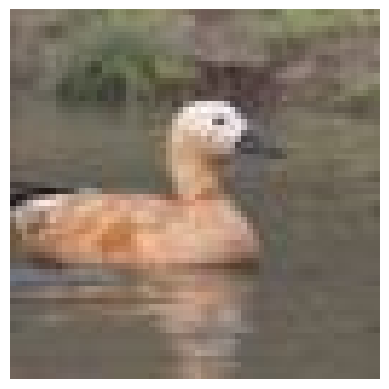

In [ ]:
custom_image_opener(ex_train_image)

In [ ]:
# label 인코딩

labels = set(list(train_df["label"]))

label_to_index = {label: idx for idx, label in enumerate(sorted(labels))}
index_to_label = {idx: label for label, idx in label_to_index.items()}

print(label_to_index)
print(index_to_label)

{'Asian Green Bee-Eater': 0, 'Brown-Headed Barbet': 1, 'Cattle Egret': 2, 'Common Kingfisher': 3, 'Common Myna': 4, 'Common Rosefinch': 5, 'Common Tailorbird': 6, 'Coppersmith Barbet': 7, 'Forest Wagtail': 8, 'Gray Wagtail': 9, 'Hoopoe': 10, 'House Crow': 11, 'Indian Grey Hornbill': 12, 'Indian Peacock': 13, 'Indian Pitta': 14, 'Indian Roller': 15, 'Jungle Babbler': 16, 'Northern Lapwing': 17, 'Red-Wattled Lapwing': 18, 'Ruddy Shelduck': 19, 'Rufous Treepie': 20, 'Sarus Crane': 21, 'White Wagtail': 22, 'White-Breasted Kingfisher': 23, 'White-Breasted Waterhen': 24}
{0: 'Asian Green Bee-Eater', 1: 'Brown-Headed Barbet', 2: 'Cattle Egret', 3: 'Common Kingfisher', 4: 'Common Myna', 5: 'Common Rosefinch', 6: 'Common Tailorbird', 7: 'Coppersmith Barbet', 8: 'Forest Wagtail', 9: 'Gray Wagtail', 10: 'Hoopoe', 11: 'House Crow', 12: 'Indian Grey Hornbill', 13: 'Indian Peacock', 14: 'Indian Pitta', 15: 'Indian Roller', 16: 'Jungle Babbler', 17: 'Northern Lapwing', 18: 'Red-Wattled Lapwing', 19: 

In [ ]:
# train_dataset 으로 저장

train_dataset = []
train_labels = []

for index, row in train_df.iterrows():
    img_path = row['img_path']
    img_label = row['label']

    image = Image.open(img_path)
    image_array = np.array(image)

    train_dataset.append(image_array)
    encoded_label = label_to_index[img_label]
    train_labels.append(encoded_label)

train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)

In [ ]:
# train_dataset shape

print(f"Dataset shape: {train_dataset.shape}")
print(f"Labels shape: {train_labels.shape}")

Dataset shape: (15834, 64, 64, 3)
Labels shape: (15834,)


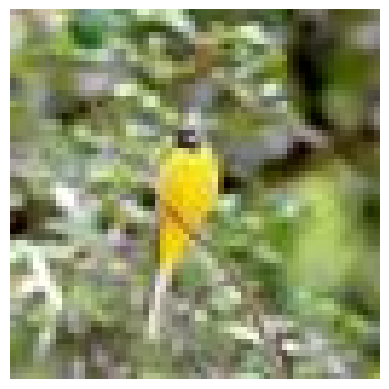

9
Gray Wagtail


In [ ]:
# 저장된 데이터셋 테스트
# RGB 잘 유지되는 것 확인 완료
# label 출력 확인

image = Image.fromarray(train_dataset[1])

plt.imshow(image)
plt.axis('off')
plt.show()

print(train_labels[1])
print(index_to_label[train_labels[1]])

In [ ]:
# train_test_split을 사용하여 데이터 분리
train_data, test_data, train_labels, test_labels = train_test_split(
    train_dataset, train_labels, test_size=0.3, random_state=77, shuffle=True
)

print(f"Train Dataset shape: {train_data.shape}, Train Labels shape: {train_labels.shape}")
print(f"Test Dataset shape: {test_data.shape}, Test Labels shape: {test_labels.shape}")

Train Dataset shape: (11083, 64, 64, 3), Train Labels shape: (11083,)
Test Dataset shape: (4751, 64, 64, 3), Test Labels shape: (4751,)


In [ ]:
# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        """
        Args:
            data (numpy.ndarray): (N, H, W, C) 형태의 이미지 데이터셋
            labels (numpy.ndarray): (N,) 형태의 라벨
            transform (callable, optional): 이미지에 적용할 변환 함수
        """
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # 이미지와 라벨 가져오기
        image = self.data[idx]
        label = self.labels[idx]

        # NumPy 배열을 PyTorch 텐서로 변환
        # Pytorch 가 처리하기 위해서는 저장된 shpae 형태를 바꾸어줘야함
        image = torch.from_numpy(image).permute(2, 0, 1).float()  # (H, W, C) → (C, H, W)

        # 정규화된 변환 적용
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Transform 정의 (정규화)
# Note : 0 ~ 255 사이의 값을 [-1 ~ 1] 사이 값으로 조정
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Dataset 및 DataLoader 생성
train_dataset = CustomImageDataset(train_data, train_labels, transform=transform)
test_dataset = CustomImageDataset(test_data, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
# 간단한 CNN 모델
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)  # (C, H, W) → (32, H, W)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1) # (32, H, W) → (64, H, W)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # (H, W) → (H/2, W/2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Flatten → Fully Connected
        self.fc2 = nn.Linear(128, 25)  # 10 클래스 출력

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # 데이터를 GPU/CPU로 이동

        # Forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward Pass 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)


In [ ]:
def test_model(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정
    running_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # 정확도 계산
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    accuracy = correct / len(test_loader.dataset)
    return running_loss / len(test_loader), accuracy


In [ ]:
# 모델 초기화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

# 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 루프
num_epochs = 5
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = test_model(model, test_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Test Loss: {test_loss:.4f}, "
          f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5, Train Loss: 13.9477, Test Loss: 3.0705, Test Accuracy: 0.1029
Epoch 2/5, Train Loss: 2.8684, Test Loss: 2.9242, Test Accuracy: 0.1726
Epoch 3/5, Train Loss: 2.5273, Test Loss: 2.9365, Test Accuracy: 0.1863
Epoch 4/5, Train Loss: 2.2155, Test Loss: 2.9367, Test Accuracy: 0.2071
Epoch 5/5, Train Loss: 1.9117, Test Loss: 3.0692, Test Accuracy: 0.2197


In [ ]:
# 학습 데이터 파일 형태로 저장
# kaggle 등 다른 플랫폼에서 데이터만 가져와 활용 가능

np.save('/content/drive/MyDrive/25 Witnter DL/train_dataset.npy', train_dataset)
np.save('/content/drive/MyDrive/25 Witnter DL/train_labels.npy', train_labels)

# numpy 데이터 불러와서 아래와 같이 데이터 분리 필요

# # train_test_split을 사용하여 데이터 분리
# train_data, test_data, train_labels, test_labels = train_test_split(
#     train_dataset, train_labels, test_size=0.3, random_state=77, shuffle=True
# )

# print(f"Train Dataset shape: {train_data.shape}, Train Labels shape: {train_labels.shape}")
# print(f"Test Dataset shape: {test_data.shape}, Test Labels shape: {test_labels.shape}")

In [ ]:
loaded_array = np.load('/content/drive/MyDrive/25 Witnter DL/train_dataset.npy')
print(loaded_array.shape)

(15834, 64, 64, 3)


In [ ]:
loaded_array = np.load('/content/drive/MyDrive/25 Witnter DL/train_labels.npy')
print(loaded_array.shape)

(15834,)
